        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  ----- 

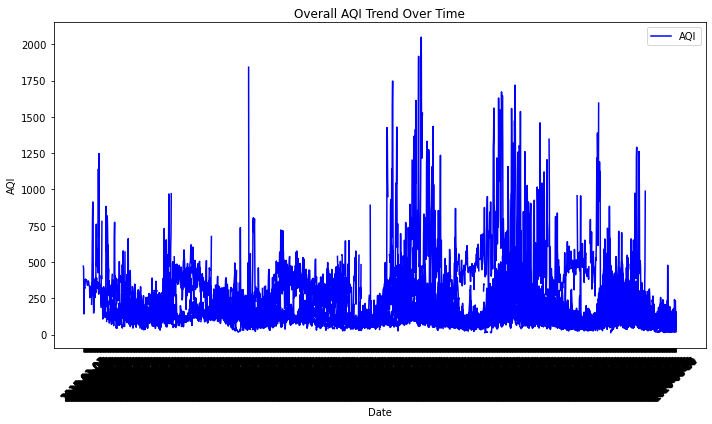

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Import the dataset
data = pd.read_csv("city_day1.csv")

# Step 2: Explore the dataset
print(data.head())
print(data.info())

# Step 3: Identify relevant variables
date_col = "Date"
aqi_col = "AQI"
pollutants = ["PM2.5", "PM10", "CO"]

# Step 4: Create overall AQI trend plot
plt.figure(figsize=(10, 6))
plt.plot(data[date_col], data[aqi_col], label="AQI", color="blue")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.title("Overall AQI Trend Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



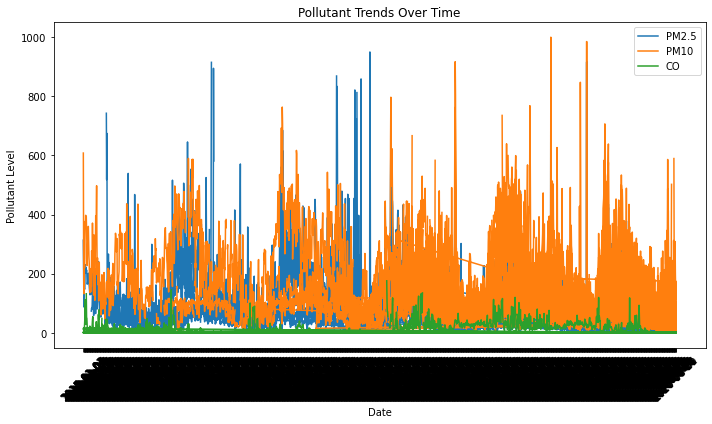

In [2]:
# Step 5: Create individual pollutant level plots
plt.figure(figsize=(10, 6))
for pollutant in pollutants:
    plt.plot(data[date_col], data[pollutant], label=pollutant)
plt.xlabel("Date")
plt.ylabel("Pollutant Level")
plt.title("Pollutant Trends Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


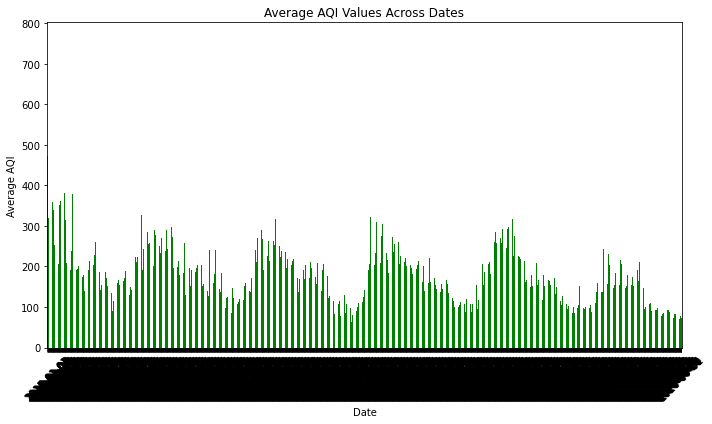

In [3]:
# Step 6: Create bar plots to compare AQI values across dates
plt.figure(figsize=(10, 6))
data_grouped = data.groupby(date_col)[aqi_col].mean()
data_grouped.plot(kind="bar", color="green")
plt.xlabel("Date")
plt.ylabel("Average AQI")
plt.title("Average AQI Values Across Dates")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


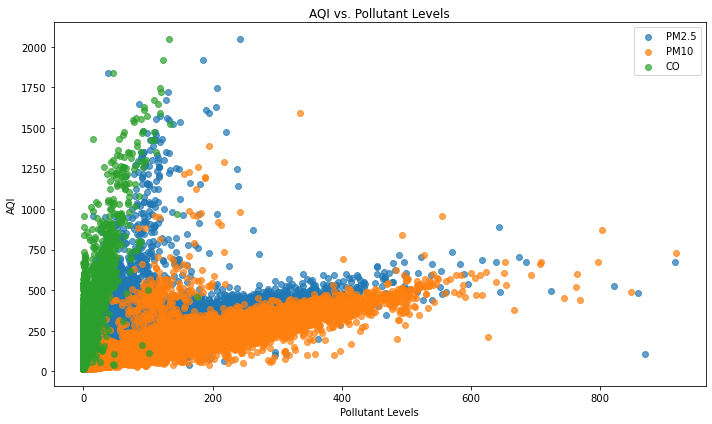

In [5]:
# Step 8: Create scatter plot to explore AQI vs. pollutant relationship
plt.figure(figsize=(10, 6))
plt.scatter(data["PM2.5"], data[aqi_col], alpha=0.7, label="PM2.5")
plt.scatter(data["PM10"], data[aqi_col], alpha=0.7, label="PM10")
plt.scatter(data["CO"], data[aqi_col], alpha=0.7, label="CO")
plt.xlabel("Pollutant Levels")
plt.ylabel("AQI")
plt.title("AQI vs. Pollutant Levels")
plt.legend()
plt.tight_layout()
plt.show()

# Plotting pollutant levels as yearly averages for cities

In [13]:
def plot_yearly_pollutant_levels(data, city_name):
    # Filter data for the given city
    city_data = data[data['City'] == city_name]

    # Extract relevant columns for pollutants and date
    pollutants = ["SO2", "NO2"]
    date_col = "Date"

    # Convert the date column to datetime format
    city_data[date_col] = pd.to_datetime(city_data[date_col])

    # Extract year from the date
    city_data['Year'] = city_data[date_col].dt.year

    # Group data by year and calculate mean pollutant levels
    yearly_avg_pollutants = city_data.groupby('Year')[pollutants].mean()

    # Plotting
    plt.figure(figsize=(10, 6))
    for pollutant in pollutants:
        plt.plot(yearly_avg_pollutants.index, yearly_avg_pollutants[pollutant], label=pollutant)
    plt.xlabel("Year")
    plt.ylabel("Pollutant Level")
    plt.title(f"Yearly Average Pollutant Levels in {city_name}")
    plt.legend()
    plt.tight_layout()
    plt.show()

<ipython-input-13-b19a37037cc7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data[date_col] = pd.to_datetime(city_data[date_col])
<ipython-input-13-b19a37037cc7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['Year'] = city_data[date_col].dt.year


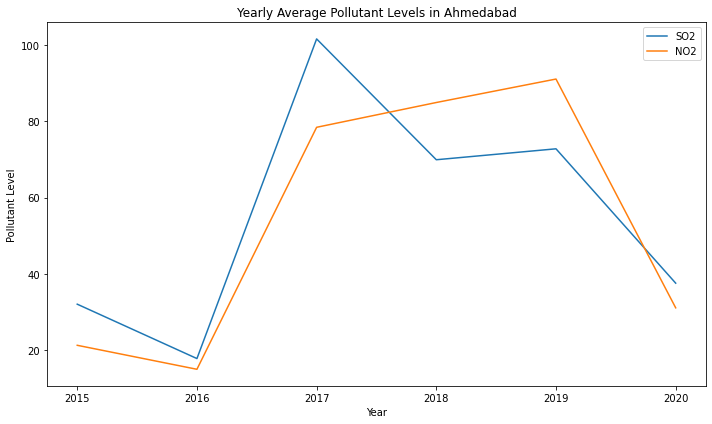

In [14]:
plot_yearly_pollutant_levels(data, city_name='Ahmedabad')

In [20]:
def plot_pollutant_levels(data, cities, pollutant):
    # Filter data for the specified cities
    city_data = data[data['City'].isin(cities)]

    # Extract relevant columns for pollutant and date
    date_col = "Date"

    # Convert the date column to datetime format
    city_data[date_col] = pd.to_datetime(city_data[date_col])

    # Create a line plot for the specified pollutant
    plt.figure(figsize=(10, 6))
    for city in cities:
        city_subset = city_data[city_data['City'] == city]
        plt.plot(city_subset[date_col], city_subset[pollutant], label=city)
    plt.xlabel("Date")
    plt.ylabel(f"{pollutant} Level")
    plt.title(f"{pollutant} Levels in {', '.join(cities)}")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plotting highest and lowest ranking cities

In [21]:
# Find the cities with the highest and lowest average AQI values
highest_avg_aqi_cities = data.groupby('City')['AQI'].mean().nlargest(2).index.tolist()
lowest_avg_aqi_cities = data.groupby('City')['AQI'].mean().nsmallest(2).index.tolist()


<ipython-input-20-20737eeb062b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data[date_col] = pd.to_datetime(city_data[date_col])


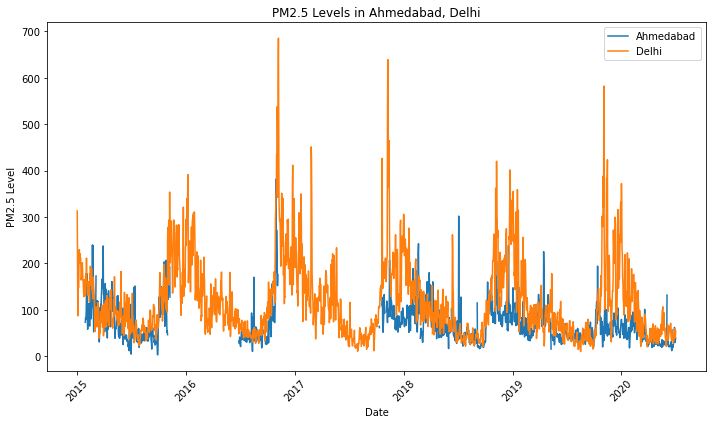

<ipython-input-20-20737eeb062b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data[date_col] = pd.to_datetime(city_data[date_col])


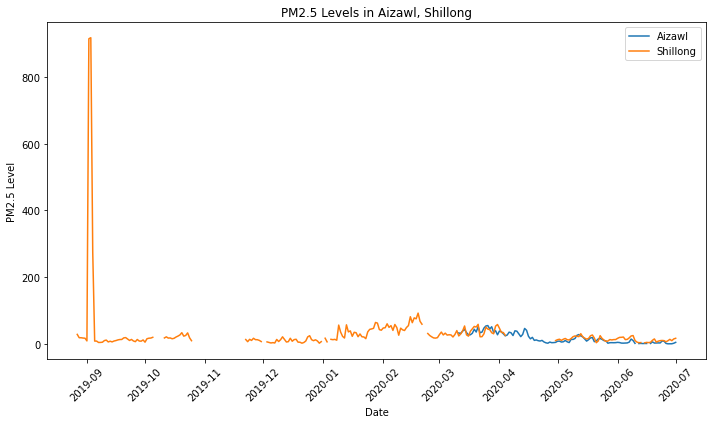

In [22]:
plot_pollutant_levels(data, cities=highest_avg_aqi_cities, pollutant='PM2.5')

# Call the function to plot pollutant levels for lowest average AQI cities
plot_pollutant_levels(data, cities=lowest_avg_aqi_cities, pollutant='PM2.5')

Replace 'PM2.5' with the pollutant for which you want to plot the levels. This code will generate separate plots for the specified pollutant in the cities with the highest and lowest average AQI values. You can customize this code to plot other pollutants or use different criteria for selecting cities as needed.

# Plotting the highest ever recorded levels

In [23]:
def plot_highest_levels(data, cities, pollutant):
    # Filter data for the specified cities
    city_data = data[data['City'].isin(cities)]

    # Find the highest recorded levels for the specified pollutant in each city
    highest_levels = city_data.groupby('City')[pollutant].max()

    # Create a bar plot for the highest recorded levels
    plt.figure(figsize=(10, 6))
    highest_levels.plot(kind='bar', color='orange')
    plt.xlabel("City")
    plt.ylabel(f"Highest {pollutant} Level")
    plt.title(f"Highest Recorded {pollutant} Levels in Cities")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


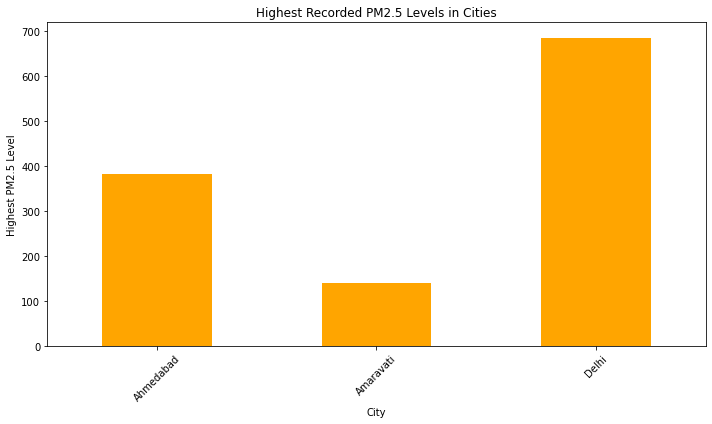

In [25]:
# Specify the cities and pollutant for which you want to plot the highest levels
cities_of_interest = ['Amaravati', 'Ahmedabad', 'Delhi']  # Replace with the cities you're interested in
pollutant_of_interest = 'PM2.5'  # Replace with the pollutant of interest

# Call the function to plot highest recorded levels for the specified cities and pollutant
plot_highest_levels(data, cities=cities_of_interest, pollutant=pollutant_of_interest)

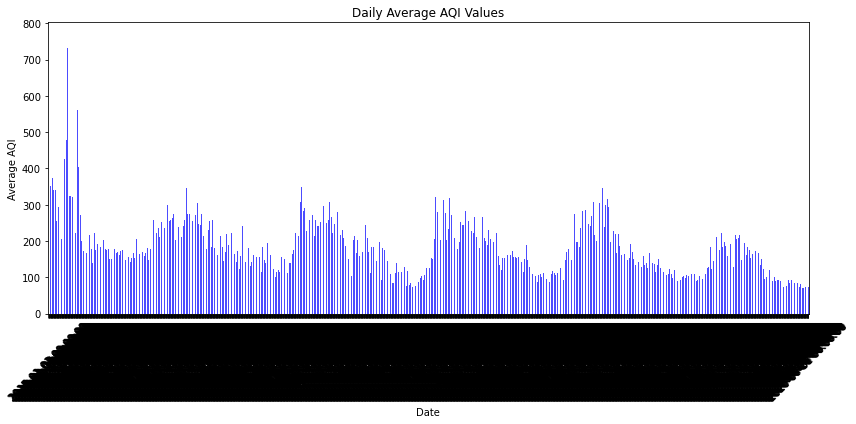

In [31]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Group data by date and calculate mean AQI
daily_avg_aqi = data.groupby('Date')['AQI'].mean()

# Create a bar plot for daily average AQI values
plt.figure(figsize=(12, 6))
daily_avg_aqi.plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Average AQI")
plt.title("Daily Average AQI Values")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()








